# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0,'..')

In [3]:
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName

from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.model_creator import Optimizer

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection

from src.exp_runner import ExperimentRunner

from src.m_utils.mtl_approach import MTLApproach

from src.base.experiment.tasks.task import ICAO_REQ
from src.base.experiment.tasks.task import MNIST_TASK
from src.base.experiment.tasks.task import FASHION_MNIST_TASK
from src.base.experiment.tasks.task import CIFAR_10_TASK
from src.base.experiment.tasks.task import CELEB_A_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vg16_mtl_3_approach',
        'description': 'Training MTL network for FVC-ICOA tasks with Handcrafted 3 network architecture',
        'tags': ['mtl', 'handcrafted_3', 'handcrafted_3_exp', 'fvc', 'ground_truths', '200 epochs'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_3,
        'benchmarking': {
            'use_benchmark_data': False,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 1,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 90559
Process ID: 100938
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for FVC-ICOA tasks with '
                               'Handcrafted 3 network architecture',
                'name': 'train_vg16_mtl_3_approach',
                'src_files': ['../src/**/*.py'],
                'tags': ['mtl',
                         'handcrafted_3',
                         'handcrafted_3_exp',
                         'fvc',
                         'ground_truths',
                         '200 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'name': 'vgg16', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f1030175790>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_st

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


In [6]:
runner.data_processor.train_data.head()

,origin,img_name,mouth,rotation,l_away,eyes_closed,close,hat,dark_glasses,frames_heavy,...,sh_head,blurred,ink_mark,skin_tone,washed_out,pixelation,hair_eyes,background,red_eyes,aligned
0,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
1,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
2,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
3,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False
4,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False


# Sampling Training Data

In [7]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [8]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [11]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [12]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

In [13]:
%%capture
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [14]:
%%capture
runner.model_summary()

# Training Model

In [15]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,555,310
  .. Trainable params: 2,840,622
  .. Non-trainable params: 14,714,688
154/154 [==============================] - 408s 3s/step - loss: 1.0098 - background_loss: 0.6182 - close_loss: 0.5494 - ink_mark_loss: 0.6390 - pixelation_loss: 0.5126 - washed_out_loss: 0.0864 - blurred_loss: 0.4303 - sh_head_loss: 0.3748 - mouth_loss: 0.0426 - veil_loss: 0.5719 - red_eyes_loss: 0.5248 - flash_lenses_loss: 0.2855 - dark_glasses_loss: 0.6942 - l_away_loss: 0.3401 - frame_eyes_loss: 0.6405 - hair_eyes_loss: 0.6337 - eyes_closed_loss: 0.3491 - frames_heavy_loss: 0.0370 - sh_face_loss: 0.6958 - skin_tone_loss: 0.0937 - light_loss: 0.3027 - hat_loss: 0.4784 - rotation_loss: 0.6688 - reflection_loss: 0.5282 - background_accuracy: 0.7287 - close_accuracy: 0.7496 - ink_mark_accuracy: 0.6849 - pixelation_accuracy: 0.7819 - washed_out_accuracy: 0.9836 - blurred_accuracy:

# Plots

-------------------- draw training history -------------------


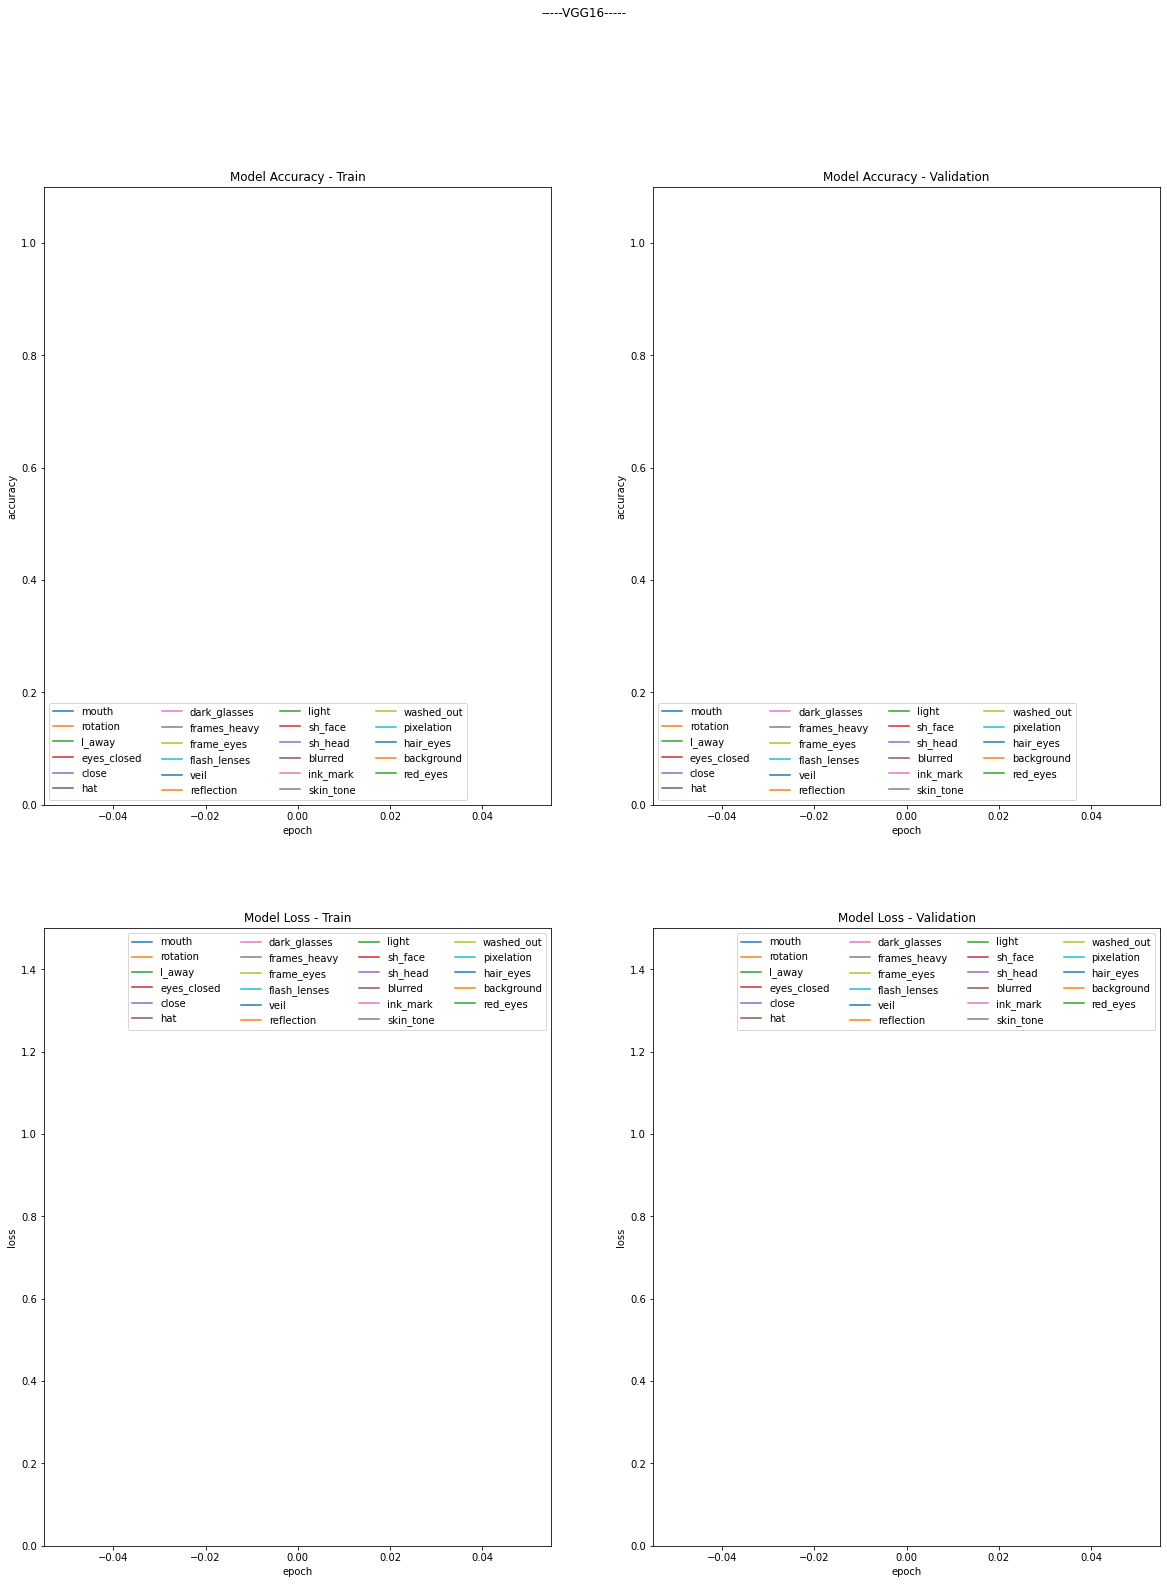

In [16]:
runner.draw_training_history()

# Load Best Model

In [17]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [18]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


  Task  0: mouth           | EER_mean: 0.35950 | EER_interp: 0.35690 | ACC: 0.64170
  Task  1: rotation        | EER_mean: 0.28050 | EER_interp: 0.27530 | ACC: 0.72210
  Task  2: l_away          | EER_mean: 0.36390 | EER_interp: 0.36380 | ACC: 0.63620
  Task  3: eyes_closed     | EER_mean: 0.35150 | EER_interp: 0.35030 | ACC: 0.64900
  Task  4: close           | EER_mean: 0.10720 | EER_interp: 0.00000 | ACC: 0.89400
  Task  5: hat             | EER_mean: 0.33330 | EER_interp: 0.33520 | ACC: 0.66360
  Task  6: dark_glasses    | EER_mean: 0.36570 | EER_interp: 0.36560 | ACC: 0.63440
  Task  7: frames_heavy    | EER_mean: 0.25180 | EER_interp: 0.00000 | ACC: 0.74950
  Task  8: frame_eyes      | EER_mean: 0.28860 | EER_interp: 0.28910 | ACC: 0.71120
  Task  9: flash_lenses    | EER_mean: 0.40710 | EER_interp: 0.40980 | ACC: 0.58870
  Task 10: veil            | EER_mean: 0.35600 | EER_interp: 0.34460 | ACC: 0.64530
  Task 11: reflection      | EER_mean: 0.50570 | EER_interp: 0.50280 | ACC: 

## Test Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
9/9 [==============================] - 30s 4s/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.39730 | EER_interp: 0.39860 | ACC: 0.60070
  Task  1: rotation        | EER_mean: 0.28850 | EER_interp: 0.28800 | ACC: 0.71180
  Task  2: l_away          | EER_mean: 0.40230 | EER_interp: 0.40260 | ACC: 0.59720
  Task  3: eyes_closed     | EER_mean: 0.34550 | EER_interp: 0.34440 | ACC: 0.65620
  Task  4: close           | EER_mean: 0.16430 | EER_interp: 0.00000 | ACC: 0.83680
  Task  5: hat             | EER_mean: 0.32070 | EER_interp: 0.31720 | ACC: 0.68060
  Task  6: dark_glasses    | EER_mean: 0.38520 | EER_interp: 0.37000 | ACC: 0.61810
  Task  7: frames_heavy    | EER_mean: 0.45800 | EER_interp: 0.00000 | ACC: 0.54510
  Task  8: frame_eyes      | EER_mean: 0.34310 | EER_interp: 0.33820 | ACC: 0.65970
  Task  9: flash_lenses    | EER_mean: 0.39040 | EER_interp: 0.38690 | ACC: 0.61110
  Task 10: veil            | EER_mean: 0.344

# Visualize Model Classification

# Finishing Experiment Manager

In [21]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
